Modelling room transfer function as a sum of room modes

In [1]:
% matplotlib inline
% matplotlib notebook
import matplotlib.pyplot as plt

# modules that we have defined
import acoustic_methods
import classes
import io_methods
import other_methods
import positioning_methods
from scipy.signal.ltisys import lsim

# python modules
import numpy as np
import os
import pickle

In [2]:
# loading and comupting the required data
data_path = os.path.join('..', 'data')
parameter_file_name = 'config.pckl'
experiment_parameters = io_methods.write_load_parameters(data_path, parameter_file_name)
for key, val in experiment_parameters.items():
    exec(key + '=val')

# generate the data for the room transfer function
eigenfrequency_table = acoustic_methods.get_eigenfrequency_table(Lx, Ly, Lz, N, TEMPERATURE)
damping_factor_table = acoustic_methods.get_damping_factor_table(Lx, Ly, Lz, WALL_IMPEDANCES, N, TEMPERATURE)
K_table = acoustic_methods.get_K_table(Lx, Ly, Lz, N)

<IPython.core.display.Javascript object>


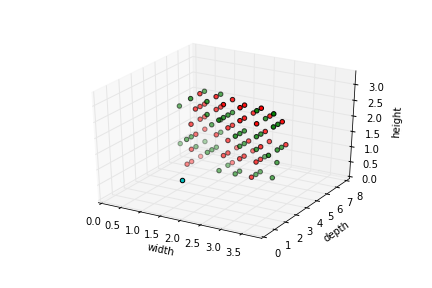

In [3]:
# visualization of the experimental setting
[pos_s, pos_mt, pos_me, spatial_sampling_step] = positioning_methods. \
get_positions(Lx, Ly, Lz, TEMPERATURE, LOWPASS_FILTER_BANDWIDTH, RECEIVER_NUMBER)
io_methods.draw_sensor_placement(Lx, Ly, Lz, pos_s, pos_mt, pos_me, spatial_sampling_step)

<IPython.core.display.Javascript object>


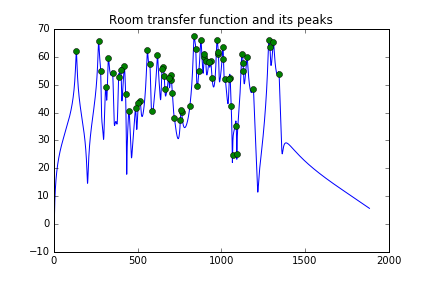

In [4]:
# frequency grid of interest
frequency_vector = np.arange(0.1, 300, 0.1)
resonant_frequency_vector = np.squeeze(np.asarray(eigenfrequency_table))
resonant_frequency_vector = resonant_frequency_vector[resonant_frequency_vector != 0]

# get room mode tables for the position of the sound source and receiver
source_room_mode_table = acoustic_methods.get_room_mode_table(Lx, Ly, Lz, N, pos_s)
receiver_room_mode_table = acoustic_methods.get_room_mode_table(Lx, Ly, Lz, N, pos_me[0])

Hf, Hf_array = acoustic_methods.get_transfer_function_fourier(N, source_room_mode_table, receiver_room_mode_table, \
                                                              eigenfrequency_table, damping_factor_table, K_table, TEMPERATURE, \
                                                              frequency_vector)
Hrf, Hrf_array = acoustic_methods.get_transfer_function_fourier(N, source_room_mode_table, receiver_room_mode_table, \
                                                                eigenfrequency_table, damping_factor_table, K_table, TEMPERATURE, \
                                                                resonant_frequency_vector)
fig = plt.figure()
plt.plot(2*np.pi*frequency_vector, 20*np.log10(np.abs(Hf)))
plt.hold(True)
plt.plot(2*np.pi*resonant_frequency_vector, 20*np.log10(np.abs(Hrf)),'o')
plt.title('Room transfer function and its peaks')